##CNN（Convolutional Neural Network ：畳み込みニューラルネットワーク）の練習
データセット：FashionMNIST\
解析手法：3層CNN


In [29]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
batch_size=128
num_class=10
epochs=20

In [31]:
(X_train,Y_train),(X_test,Y_test)=keras.datasets.fashion_mnist.load_data()
X_train[:10]

array([[[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       ...,

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0

In [32]:
keras.backend.image_data_format()

'channels_last'

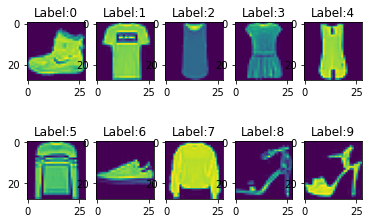

In [33]:
len(X_train)
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.title("Label:"+str(i))
  plt.imshow(X_train[i].reshape(28,28),cmap=None)

In [34]:
X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)

In [35]:
# print(Y_train[0:10])
X_train,X_test = X_train/255.0, X_test/255.0
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [36]:
model=keras.models.Sequential([
                               keras.layers.Conv2D(32,kernel_size=(3,3),
                                                   activation='relu',
                                                   input_shape=(28,28,1)),
                               keras.layers.Conv2D(64,(3,3),activation='relu'),
                               keras.layers.MaxPool2D(pool_size=(2,2)),
                               keras.layers.Dropout(0.25),
                               keras.layers.Flatten(),
                               keras.layers.Dense(128,activation='relu'),
                               keras.layers.Dropout(0.5),
                               keras.layers.Dense(num_class,activation='softmax')
                              ])                              
#CNNの内部

In [37]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
history=model.fit(X_train,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 172s 92ms/step - loss: 0.4745 - accuracy: 0.8312
Epoch 2/5
1875/1875 [==============================] - 171s 91ms/step - loss: 0.3193 - accuracy: 0.8853
Epoch 3/5
1875/1875 [==============================] - 170s 91ms/step - loss: 0.2707 - accuracy: 0.9017
Epoch 4/5
1875/1875 [==============================] - 170s 91ms/step - loss: 0.2429 - accuracy: 0.9106
Epoch 5/5
1875/1875 [==============================] - 171s 91ms/step - loss: 0.2194 - accuracy: 0.9192


In [39]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 9s 27ms/step - loss: 0.2193 - accuracy: 0.9214


[0.21933484077453613, 0.9214000105857849]